In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
def read_df(df_name):
    features=['To_go','Age','Workclass','Final_Weight','Education','Education_Num','Marital_Status','Occupation','Relationship',
         'Race','Sex','Capital_Gain','Capital_Loss','Hours_per_Week','Native_Country','Class'
         ]
    df=pd.read_csv(df_name,names=features, header=None,na_values=' ?')
    df.drop('To_go',axis=1,inplace=True)
    return df

In [10]:
df_train=read_df('train-project.data')
df_test=read_df('test-project.data')

In [11]:
df_train.head()

,Age,Workclass,Final_Weight,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Native_Country,Class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,60,Private,40856,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,46,United-States,>50K
2,45,Private,289230,Bachelors,13,Divorced,Prof-specialty,Unmarried,White,Female,0,0,48,United-States,>50K
3,26,Federal-gov,52322,Bachelors,13,Never-married,Tech-support,Not-in-family,Other,Male,0,0,60,United-States,<=50K
4,35,Private,27408,Some-college,10,Never-married,Sales,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [12]:
df_test.head()

,Age,Workclass,Final_Weight,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Native_Country,Class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,33,Private,182423,HS-grad,9,Divorced,Other-service,Unmarried,Black,Male,0,0,40,United-States,<=50K
2,32,Private,178623,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Female,0,0,40,NaN,<=50K
3,39,Private,108540,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
4,51,Private,21698,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K


In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             10000 non-null  int64 
 1   Workclass       9416 non-null   object
 2   Final_Weight    10000 non-null  int64 
 3   Education       10000 non-null  object
 4   Education_Num   10000 non-null  int64 
 5   Marital_Status  10000 non-null  object
 6   Occupation      9412 non-null   object
 7   Relationship    10000 non-null  object
 8   Race            10000 non-null  object
 9   Sex             10000 non-null  object
 10  Capital_Gain    10000 non-null  int64 
 11  Capital_Loss    10000 non-null  int64 
 12  Hours_per_Week  10000 non-null  int64 
 13  Native_Country  9825 non-null   object
 14  Class           10000 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.1+ MB


In [14]:
df_test.describe()

,Age,Final_Weight,Education_Num,Capital_Gain,Capital_Loss,Hours_per_Week
count,12561.000000,1.256100e+04,12561.000000,12561.000000,12561.000000,12561.000000
mean,38.556246,1.898323e+05,10.105565,1062.870791,88.918876,40.404984
std,13.599201,1.059444e+05,2.579439,7264.610038,406.916499,12.391108
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.174440e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.782070e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.363210e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.366120e+06,16.000000,99999.000000,4356.000000,99.000000


Text(0.5, 1.0, 'Train Data Visualisation')

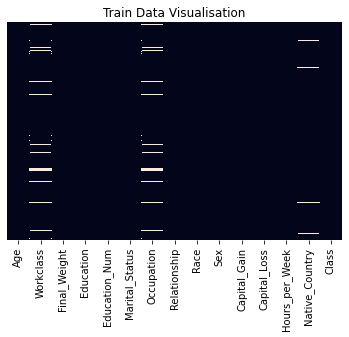

In [15]:
Train_Data_Vis=sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False)
Train_Data_Vis.set_title('Train Data Visualisation')
#As we can see we have many Null values for Workclass, Occupation and Native_Country 

Text(0.5, 1.0, 'Test Data Visualisation')

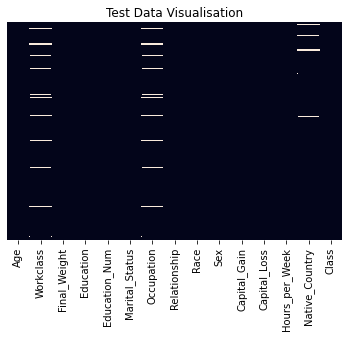

In [16]:
Test_Data_Vis=sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False)
Test_Data_Vis.set_title('Test Data Visualisation')
#As we can see we have many Null values for Workclass, Occupation and Native_Country 

In [17]:
#The total number of rows for the whole Train and Test datasets
print(f"Number of rows for Train Data set {df_train.shape[0]}")
print(f"Number of rows for Test Data set {df_test.shape[0]}")

Number of rows for Train Data set 10000
Number of rows for Test Data set 12561


In [18]:
#Creating a dataframe of only rows that contain at least one null value
df_train_na=df_train[df_train.isnull().any(1)]
df_test_na=df_test[df_test.isnull().any(1)]

In [19]:
print(f"Number of rows that contain null values for Train Data set {df_train_na.shape[0]}")
print(f"Number of rows that contain null values for Test Data set {df_test_na.shape[0]}")

Number of rows that contain null values for Train Data set 755
Number of rows that contain null values for Test Data set 921


<AxesSubplot:>

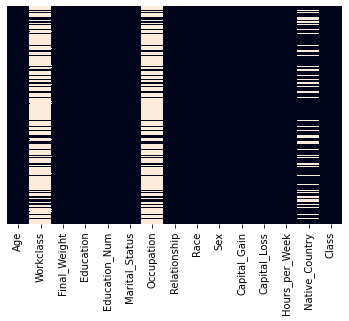

In [20]:
sns.heatmap(df_train_na.isnull(),yticklabels=False,cbar=False,)
#Visualization heatmap on the data with only null values for Train dataset

<AxesSubplot:>

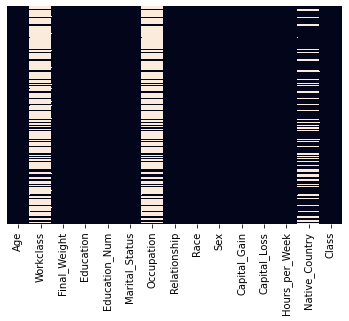

In [21]:
sns.heatmap(df_test_na.isnull(),yticklabels=False,cbar=False)
#Visualization heatmap on the data with only null values for Test dataset

In [22]:
print(f"Percentage of null values in Train dataset {(df_train_na.shape[0]/df_train.shape[0])*100} %")
print(f"Percentage of null values in Test dataset {round((df_test_na.shape[0]/df_test.shape[0])*100,2)} %")

Percentage of null values in Train dataset 7.55 %
Percentage of null values in Test dataset 7.33 %


In [23]:
#Because the percentage of the rows that contain at least one null value is small for both Train and Test datasets
#and because these values are categorical (only identified in columns: Workclass, Occupation, Native_Country)
#it is not easy to be replaced by a value (mean,median)
#The best approach was decided to be for these rows to be removed from the dataset completely
df_train_2=df_train.dropna()
df_test_2=df_test.dropna()

Text(0.5, 1.0, 'Train Data Visualisation after removing Nulls')

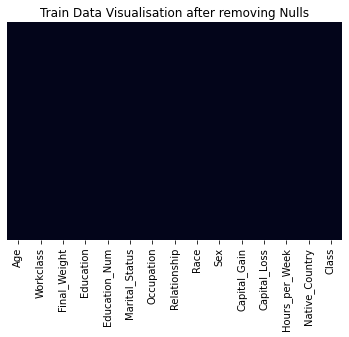

In [24]:
Train_Data_Vis_2=sns.heatmap(df_train_2.isnull(),yticklabels=False,cbar=False)
Train_Data_Vis_2.set_title('Train Data Visualisation after removing Nulls')
#As we can see we have no Null values for Workclass, Occupation and Native_Country 

Text(0.5, 1.0, 'Test Data Visualisation after removing Nulls')

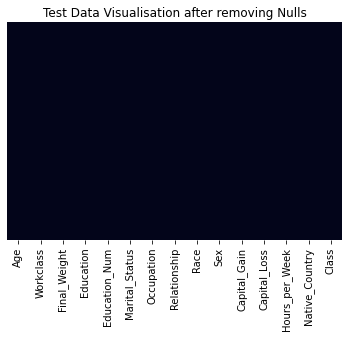

In [25]:
Test_Data_Vis_2=sns.heatmap(df_test_2.isnull(),yticklabels=False,cbar=False)
Test_Data_Vis_2.set_title('Test Data Visualisation after removing Nulls')
#As we can see we have no Null values for Workclass, Occupation and Native_Country 

In [26]:
#The total number of rows for the whole Train and Test datasets
print(f"Number of rows for Train Data set after removing nulls {df_train_2.shape[0]}")
print(f"Number of rows for Test Data set after removing nulls {df_test_2.shape[0]}")

Number of rows for Train Data set after removing nulls 9245
Number of rows for Test Data set after removing nulls 11640


In [27]:
#Next we need to check our datasets for inbalances that means that the number of observations of the
# <=50k class is equal to the number of observations for the >50k class
#Class_0 = <=50k
#Class_1 = >50k
df_class_train=df_train_2['Class']
Class_0_df=df_class_train[df_class_train==' <=50K']
Class_1_df=df_class_train[df_class_train==' >50K']

In [28]:
print(f"Number of Observations Below 50K for Train Dataset is {Class_0_df.shape[0]}, Percentage: {round((Class_0_df.shape[0]/df_class_train.shape[0])*100,2)} %")
print(f"Number of Observations Above 50K for Train Dataset is {Class_1_df.shape[0]}, Percentage: {round((Class_1_df.shape[0]/df_class_train.shape[0])*100,2)} %")
#We can clearly see that the dataset is inbalanced as 75% of the data belong to class 0 
#and 25% belong to class 1 

Number of Observations Below 50K for Train Dataset is 6943, Percentage: 75.1 %
Number of Observations Above 50K for Train Dataset is 2302, Percentage: 24.9 %


In [29]:
#The whole methodology above was summarized in a function
def inbalances_check(df,data_name):
    df_class=df['Class']
    Class_0=df_class[df_class==' <=50K']
    Class_1=df_class[df_class==' >50K']
    print(f"Number of Observations Below 50K for {data_name} Dataset {Class_0.shape[0]} Percentage: {round((Class_0.shape[0]/df_class.shape[0])*100,2)} %")
    print(f"Number of Observations Above 50K for {data_name} Dataset {Class_1.shape[0]} Percentage: {round((Class_1.shape[0]/df_class.shape[0])*100,2)} %")
    return Class_0.shape[0],Class_1.shape[0]

In [30]:
Class_0_train,Class_1_train=inbalances_check(df_train_2,'Train')
print("\n")
Class_0_test,Class_1_test=inbalances_check(df_test_2,'Test')

Number of Observations Below 50K for Train Dataset 6943 Percentage: 75.1 %
Number of Observations Above 50K for Train Dataset 2302 Percentage: 24.9 %


Number of Observations Below 50K for Test Dataset 8760 Percentage: 75.26 %
Number of Observations Above 50K for Test Dataset 2880 Percentage: 24.74 %


In [31]:
df_train_2.head()

,Age,Workclass,Final_Weight,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Native_Country,Class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,60,Private,40856,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,46,United-States,>50K
2,45,Private,289230,Bachelors,13,Divorced,Prof-specialty,Unmarried,White,Female,0,0,48,United-States,>50K
3,26,Federal-gov,52322,Bachelors,13,Never-married,Tech-support,Not-in-family,Other,Male,0,0,60,United-States,<=50K
4,35,Private,27408,Some-college,10,Never-married,Sales,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [32]:
#Number of labels per categorical column
categorical_col=['Workclass','Education','Marital_Status','Occupation','Relationship','Race','Native_Country']
for cat in categorical_col:
    print(f"{cat}, {len(df_train_2[cat].unique())} labels")

Workclass, 7 labels
Education, 16 labels
Marital_Status, 7 labels
Occupation, 14 labels
Relationship, 6 labels
Race, 5 labels
Native_Country, 40 labels


In [33]:
ohe_df_train=pd.get_dummies(df_train_2)

In [34]:
ohe_df_train.head()

,Age,Final_Weight,Education_Num,Capital_Gain,Capital_Loss,Hours_per_Week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Native_Country_ Scotland,Native_Country_ South,Native_Country_ Taiwan,Native_Country_ Thailand,Native_Country_ Trinadad&Tobago,Native_Country_ United-States,Native_Country_ Vietnam,Native_Country_ Yugoslavia,Class_ <=50K,Class_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,60,40856,11,0,0,46,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
2,45,289230,13,0,0,48,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
3,26,52322,13,0,0,60,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,35,27408,10,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [35]:
#As can be seen after one hot encoding 90 extra columns were added into the df increasing the dimensions
print(f"df shape before One hot encoding: {df_train_2.shape}")
print(f"df shape after One hot encoding: {ohe_df_train.shape}")

df shape before One hot encoding: (9245, 15)
df shape after One hot encoding: (9245, 105)


In [36]:
def plot_column_distr(df,column):
    check_col=df[column].value_counts().sort_values(ascending=False)
    check_col.plot(kind="bar",figsize=(25, 15))

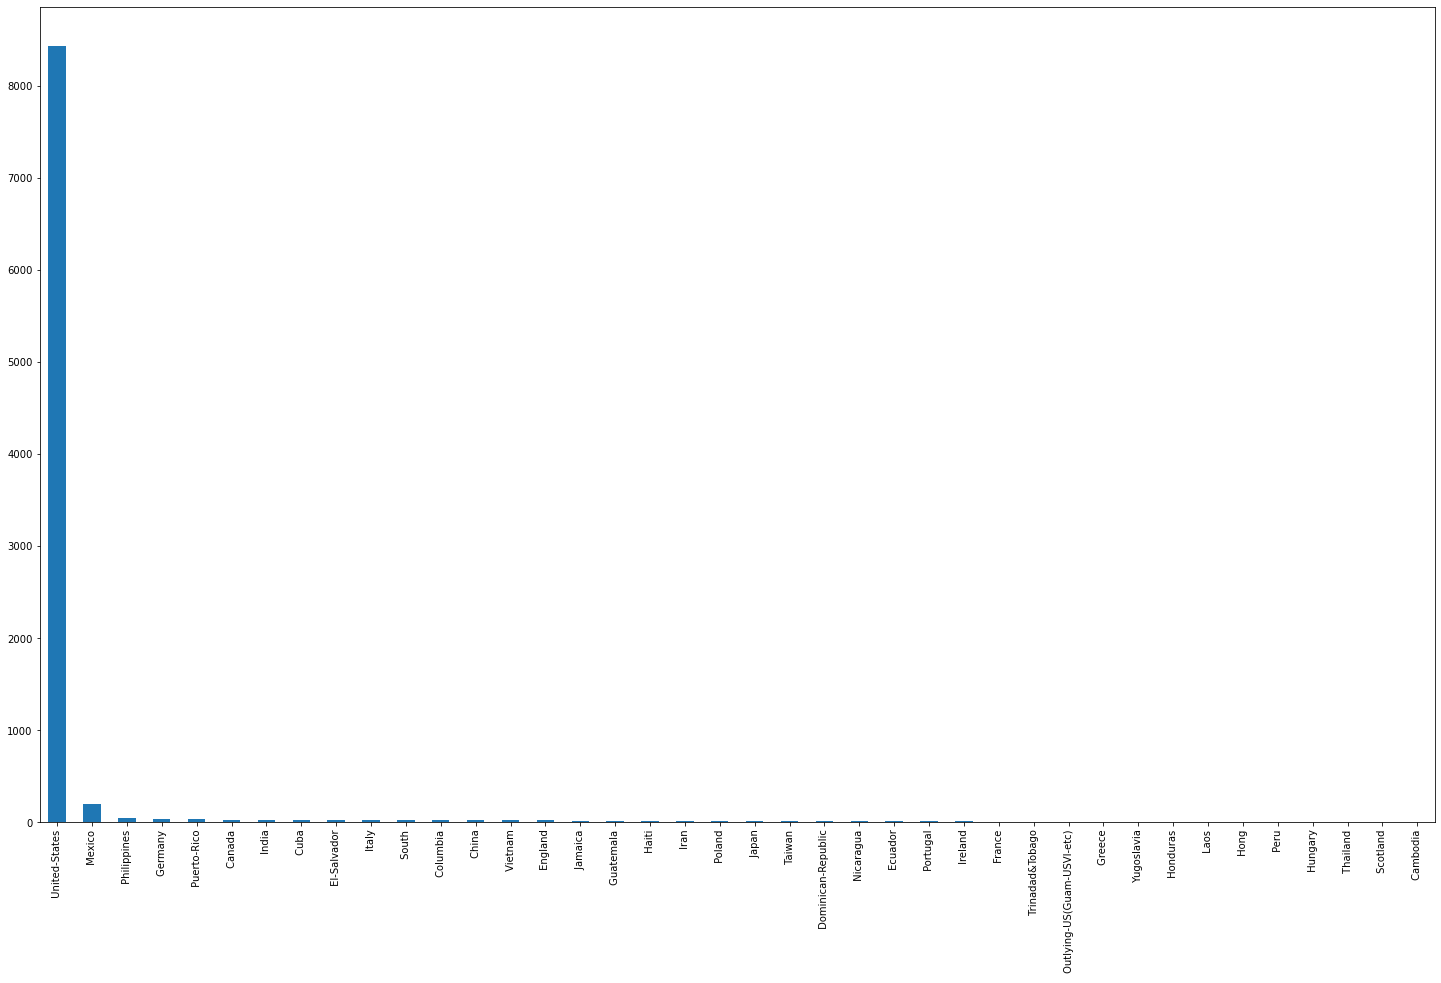

In [37]:
#We can see that Native_Country, Education and Occupation have the most categories (>10)
plot_column_distr(df_train_2,"Native_Country")

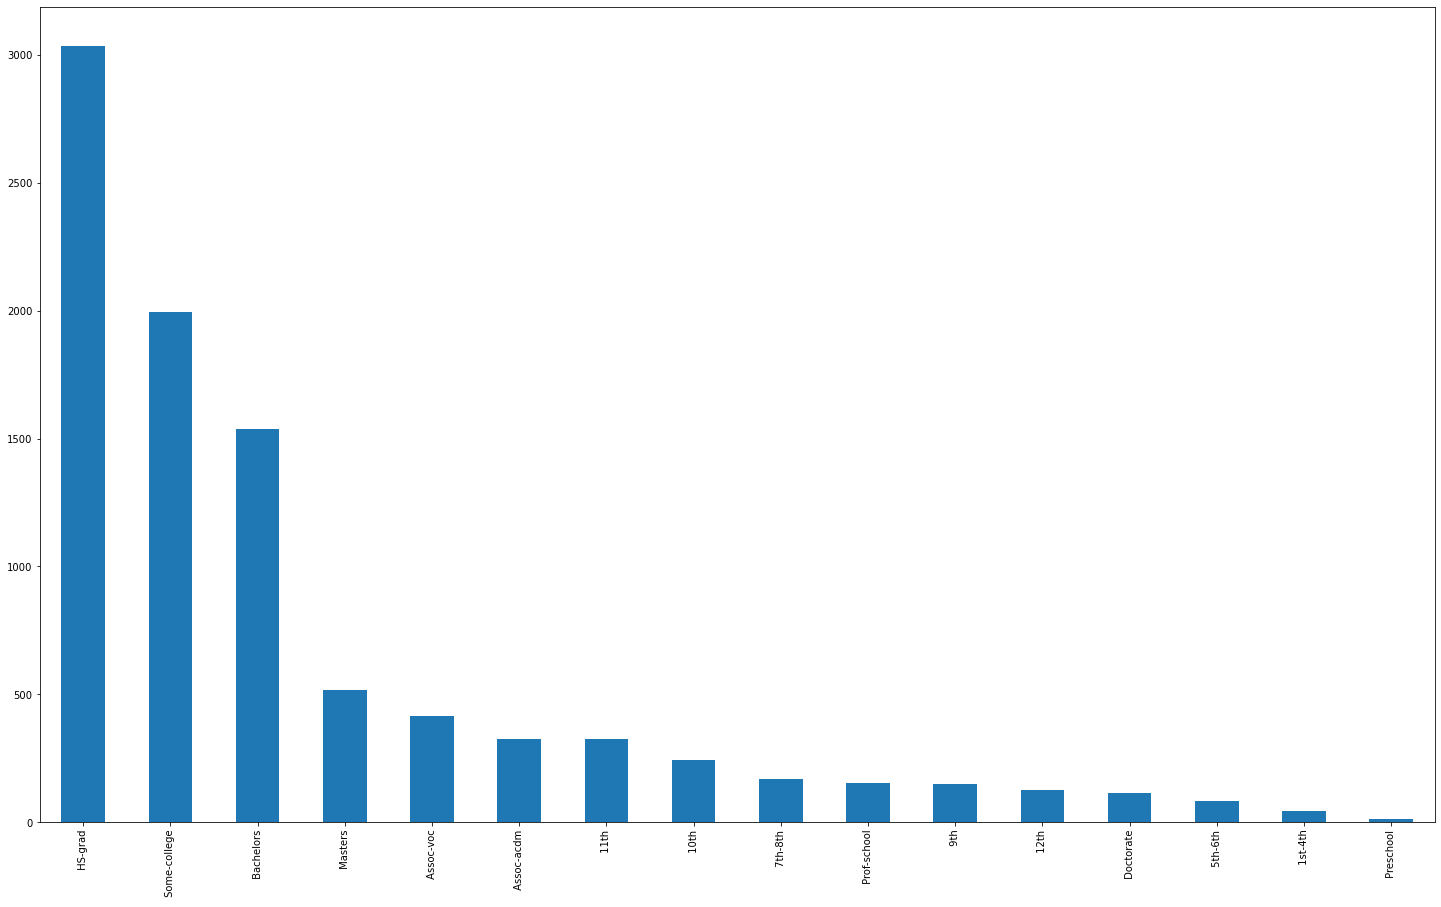

In [38]:
plot_column_distr(df_train_2,"Education")

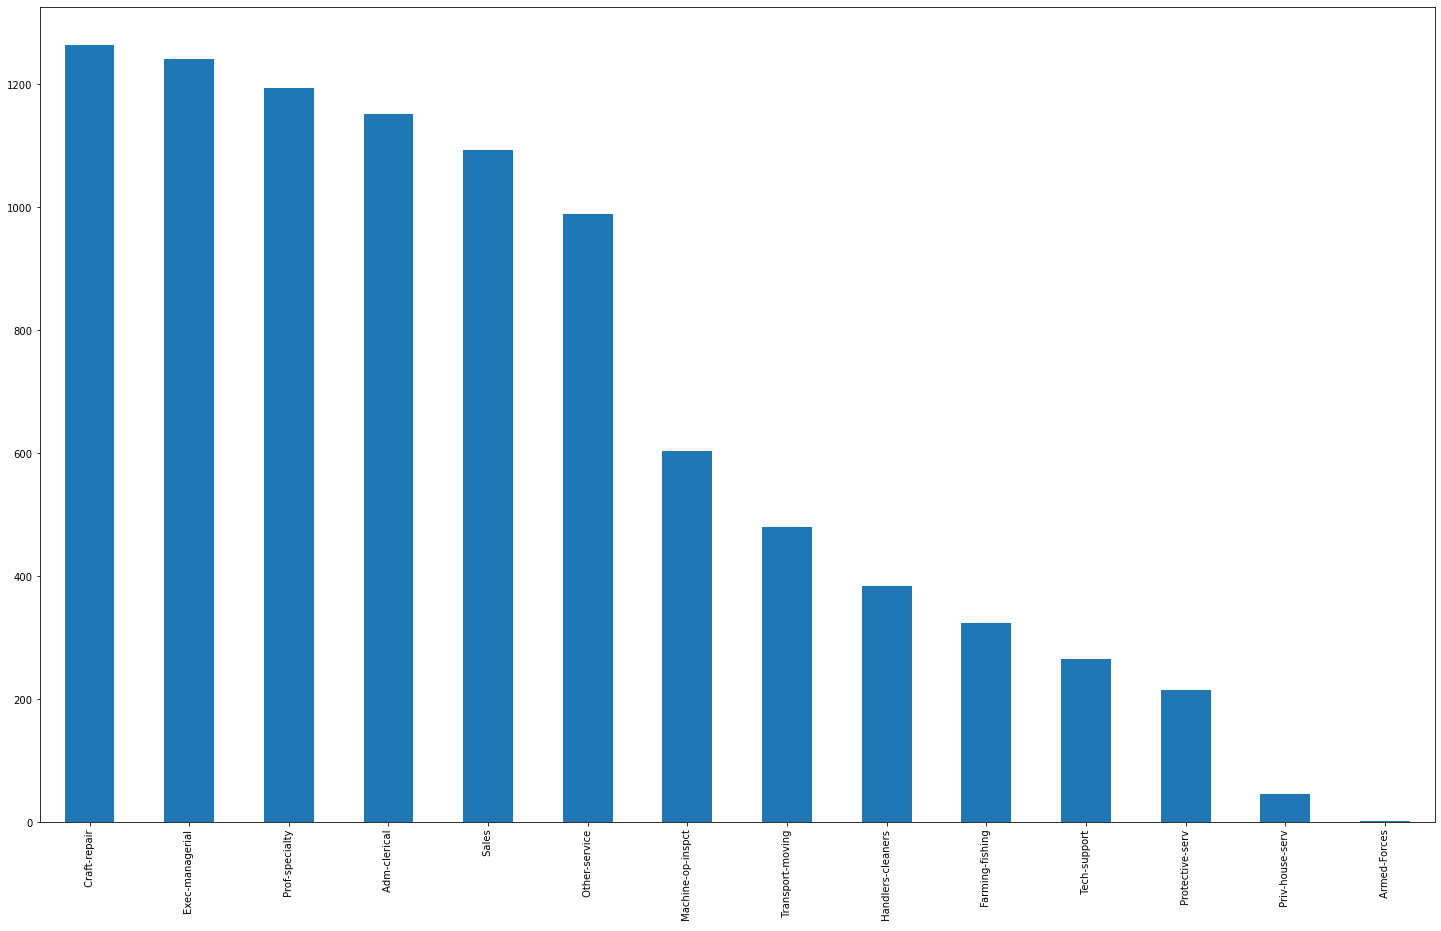

In [39]:
plot_column_distr(df_train_2,"Occupation")

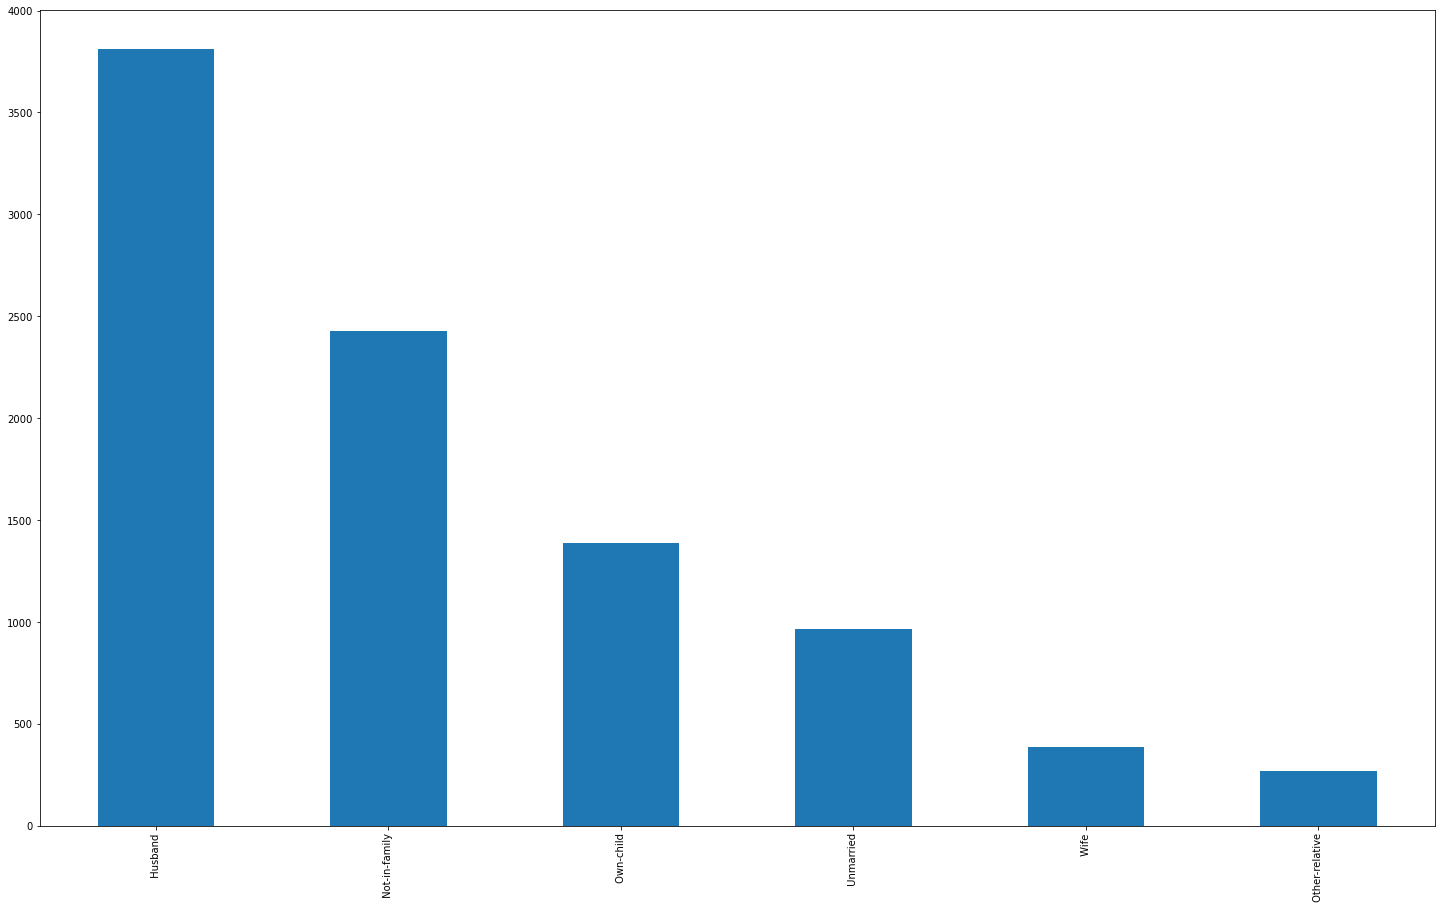

In [40]:
plot_column_distr(df_train_2,"Relationship")

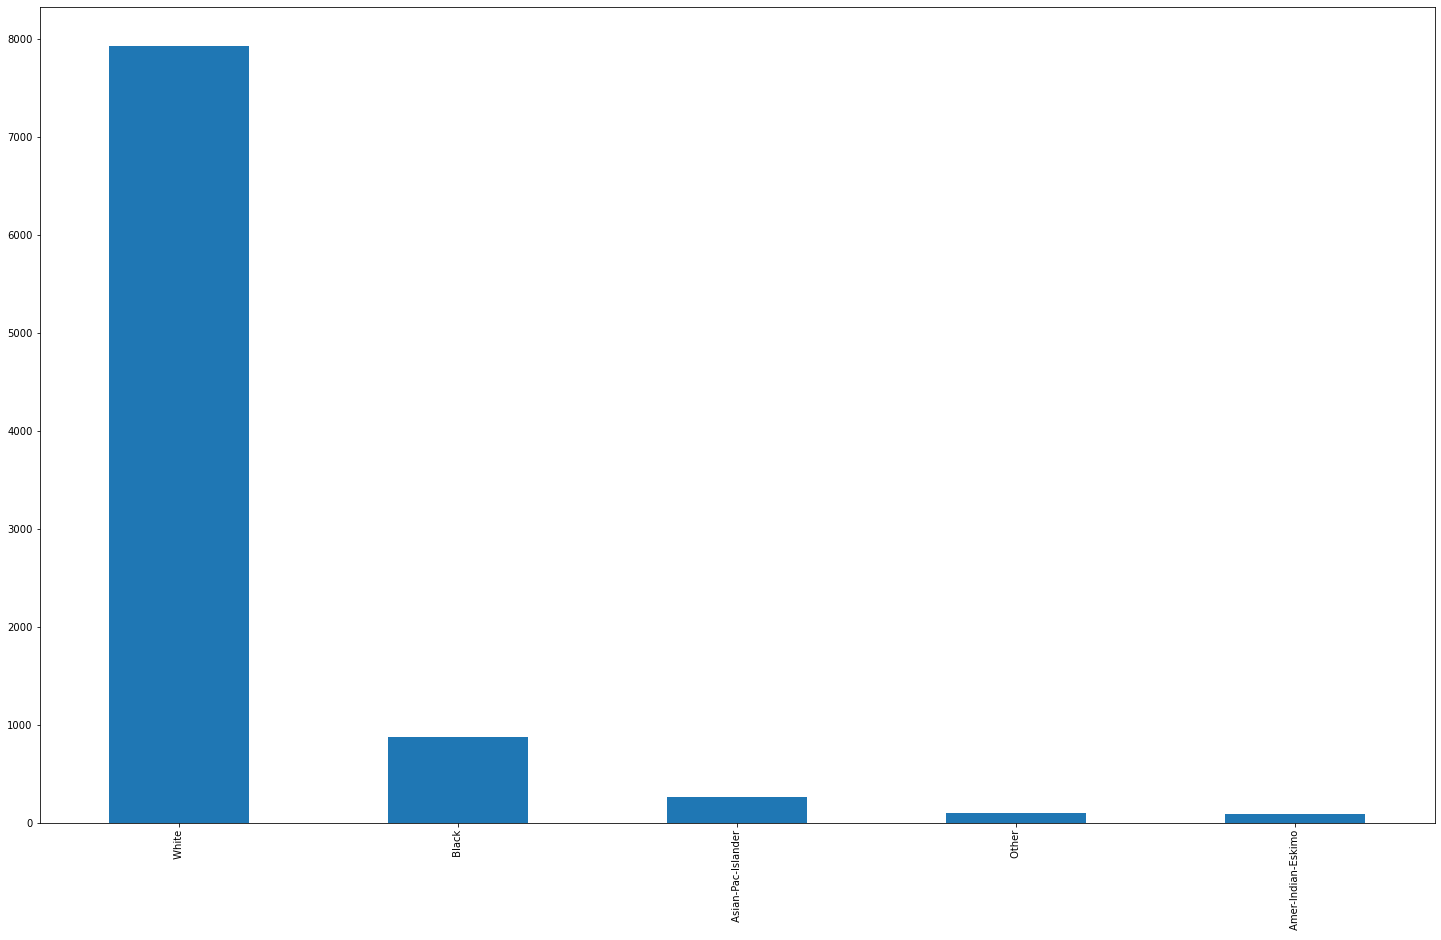

In [41]:
plot_column_distr(df_train_2,"Race")

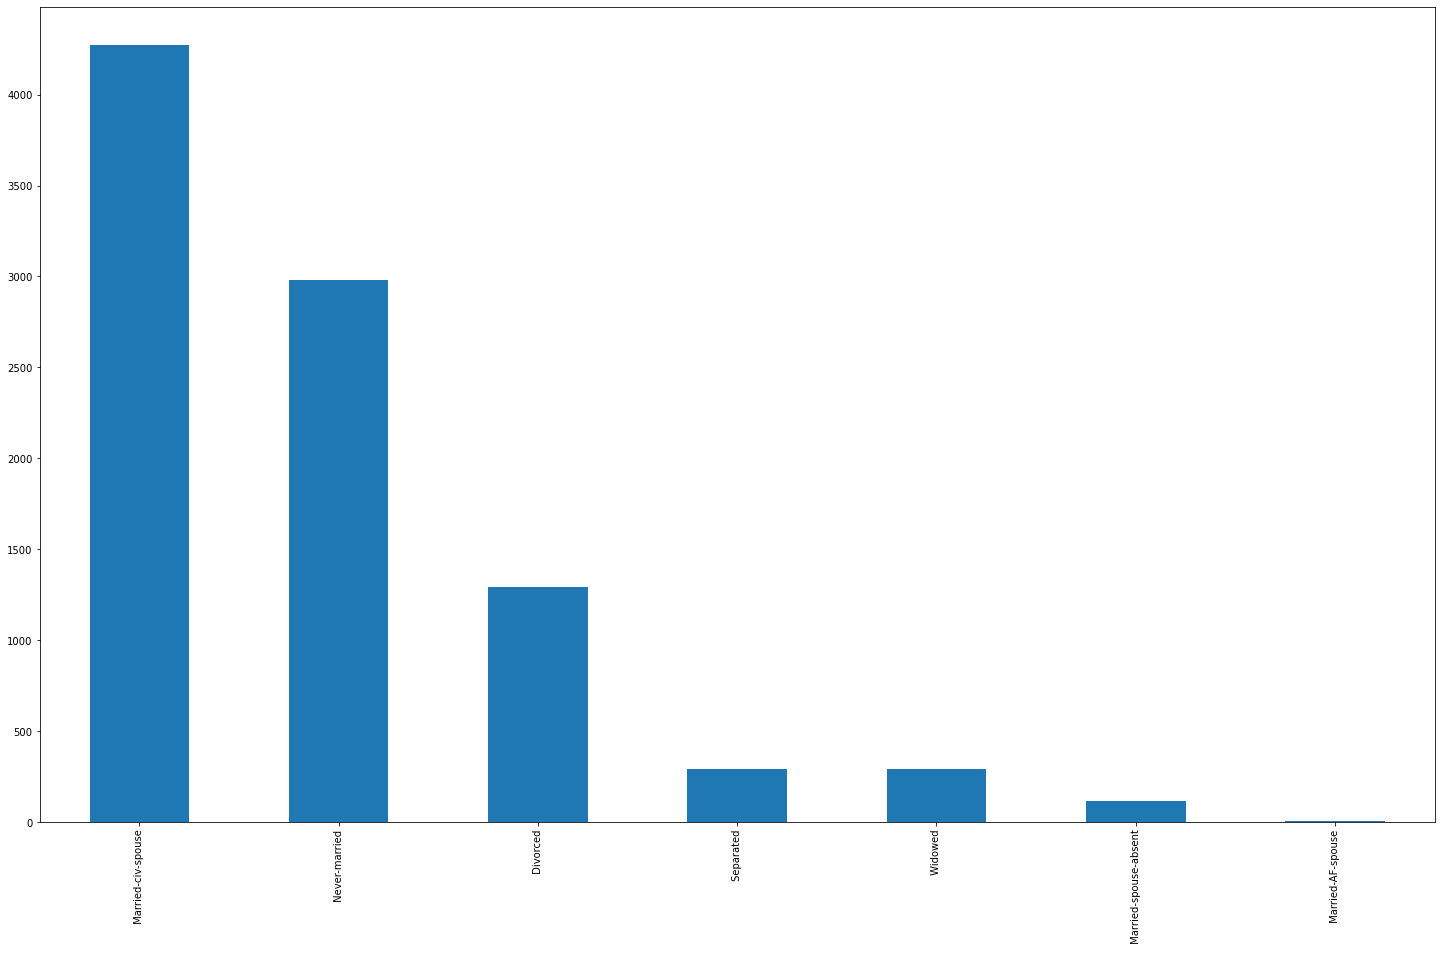

In [42]:
plot_column_distr(df_train_2,"Marital_Status")

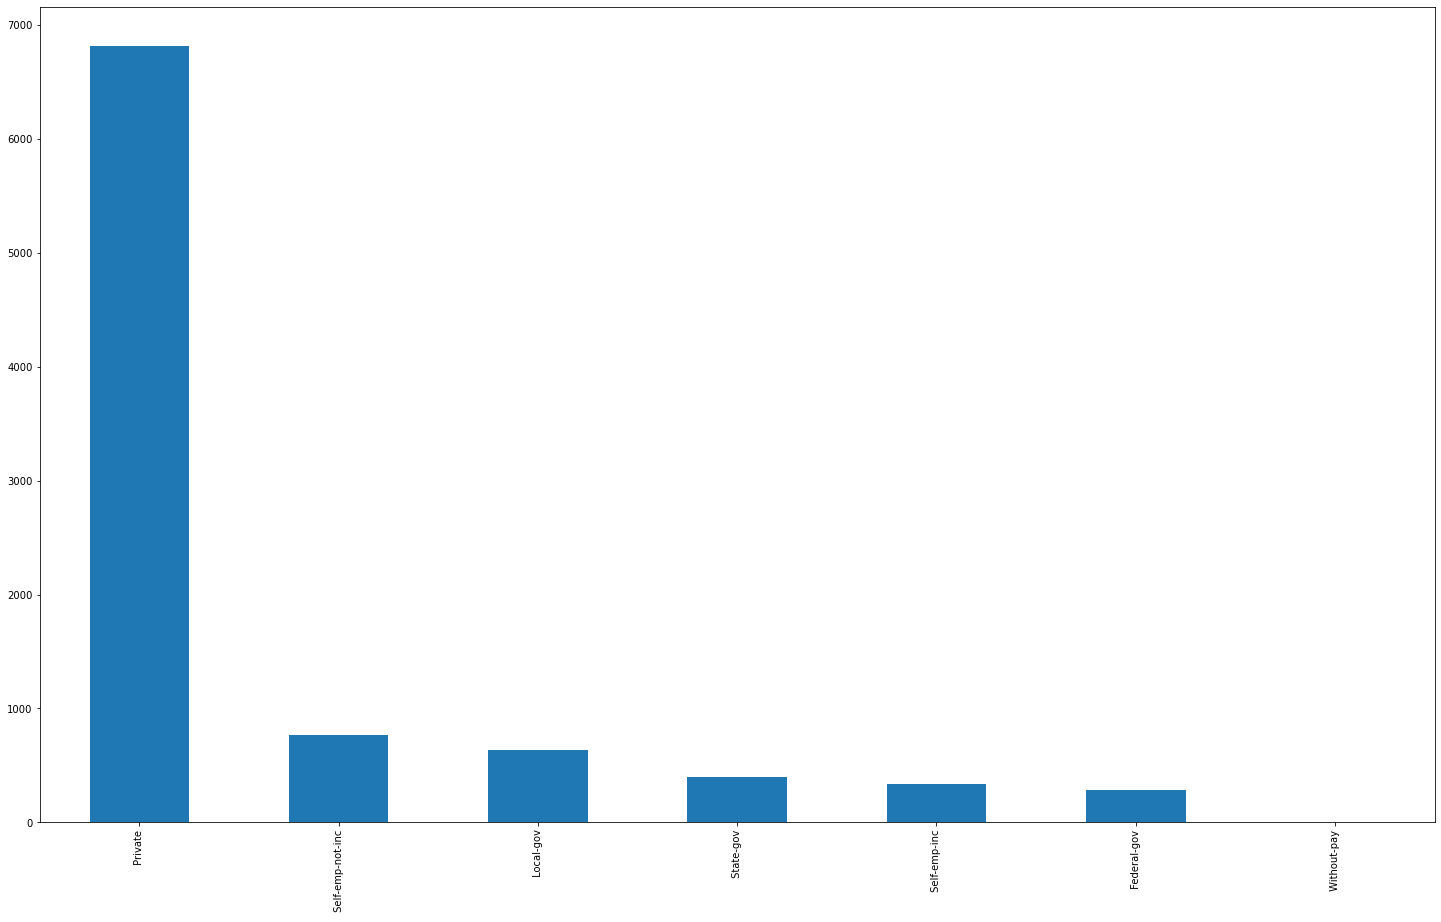

In [43]:
plot_column_distr(df_train_2,"Workclass")

In [44]:
#As we can see for many categories like Native_Country there are many observations under only one category
#Which means that we can take only the first N categories and remove everything else from the rest of categiries
def removing_features(df,list_of_features):
    for i in list_of_features:
        df.drop(i,axis=1,inplace=True)
    return df

In [45]:
countries_rmv=['Native_Country_'+str(i) for i in df_train_2['Native_Country'].unique()]

In [46]:
df_train_3=removing_features(ohe_df_train,countries_rmv[1:])

In [47]:
#Here we make a list withh all the categories of education that we want to remove
Education_rmv=list(df_train_2['Education'].value_counts().sort_values(ascending=False).index)[6:]

In [48]:
Education_rmv

[' 11th',
 ' 10th',
 ' 7th-8th',
 ' Prof-school',
 ' 9th',
 ' 12th',
 ' Doctorate',
 ' 5th-6th',
 ' 1st-4th',
 ' Preschool']

In [49]:
#Doctorate was removed from the list because it is a very significant factor to someone's salary
Education_rmv.pop(6)

' Doctorate'

In [50]:
Education_rmv_fnl=['Education_'+str(i) for i in Education_rmv]

In [51]:
df_train_3=removing_features(ohe_df_train,Education_rmv_fnl)                    

In [52]:
df_train_3.head()

,Age,Final_Weight,Education_Num,Capital_Gain,Capital_Loss,Hours_per_Week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Race_ Amer-Indian-Eskimo,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Female,Sex_ Male,Native_Country_ United-States,Class_ <=50K,Class_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,1,0,1,1,1,0
1,60,40856,11,0,0,46,0,0,1,0,...,0,0,0,0,1,0,1,1,0,1
2,45,289230,13,0,0,48,0,0,1,0,...,0,0,0,0,1,1,0,1,0,1
3,26,52322,13,0,0,60,1,0,0,0,...,0,0,0,1,0,0,1,1,1,0
4,35,27408,10,0,0,40,0,0,1,0,...,0,0,0,0,1,0,1,1,1,0


In [53]:
#As can be seen the majority of the data are for Race = white so we can remove the rest
Race_rmv=['Race_'+str(i) for i in df_train_2['Race'].unique()]

In [54]:
df_train_3=removing_features(ohe_df_train,Race_rmv[1:])          

In [55]:
#Droping the Female Column we have only two values for sex
df_train_3.drop('Sex_ Female',axis=1,inplace=True)
#komple einai apla to ksanatrexa

In [56]:
#Dropping >50k as we have only two classes
df_train_3.drop('Class_ <=50K',axis=1,inplace=True)

In [57]:
df_train_3.shape

(9245, 51)

In [58]:
Occupation_rmv=list(df_train_2['Occupation'].value_counts().sort_values(ascending=False).index)[8:]

In [59]:
Occupation_rmv_final=['Occupation_'+str(i) for i in Occupation_rmv]

In [60]:
df_train_3=removing_features(ohe_df_train,Occupation_rmv_final) 

In [61]:
df_train_3.head()

,Age,Final_Weight,Education_Num,Capital_Gain,Capital_Loss,Hours_per_Week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Relationship_ Husband,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ White,Sex_ Male,Native_Country_ United-States,Class_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,1,0,0,0,0,1,1,1,0
1,60,40856,11,0,0,46,0,0,1,0,...,1,0,0,0,0,0,1,1,1,1
2,45,289230,13,0,0,48,0,0,1,0,...,0,0,0,0,1,0,1,0,1,1
3,26,52322,13,0,0,60,1,0,0,0,...,0,1,0,0,0,0,0,1,1,0
4,35,27408,10,0,0,40,0,0,1,0,...,0,1,0,0,0,0,1,1,1,0


In [62]:
Marital_Status_rmv=list(df_train_2['Marital_Status'].value_counts().sort_values(ascending=False).index)[1:]
Marital_Status_rmv_final=['Marital_Status_'+str(i) for i in Marital_Status_rmv]

In [63]:
df_train_3=removing_features(ohe_df_train,Marital_Status_rmv_final)

In [64]:
workclass=list(df_train_2['Workclass'].value_counts().sort_values(ascending=False).index)[1:]
workclass_rmv=['Workclass_'+str(i) for i in workclass]

In [65]:
df_train_3=removing_features(ohe_df_train,workclass_rmv)

In [66]:
#We ended up from 105 columns after One hoT Encoding to 32 after the modifications above removing 73 columns
df_train_3.columns

Index(['Age', 'Final_Weight', 'Education_Num', 'Capital_Gain', 'Capital_Loss',
       'Hours_per_Week', 'Workclass_ Private', 'Education_ Assoc-acdm',
       'Education_ Assoc-voc', 'Education_ Bachelors', 'Education_ Doctorate',
       'Education_ HS-grad', 'Education_ Masters', 'Education_ Some-college',
       'Marital_Status_ Married-civ-spouse', 'Occupation_ Adm-clerical',
       'Occupation_ Craft-repair', 'Occupation_ Exec-managerial',
       'Occupation_ Machine-op-inspct', 'Occupation_ Other-service',
       'Occupation_ Prof-specialty', 'Occupation_ Sales',
       'Occupation_ Transport-moving', 'Relationship_ Husband',
       'Relationship_ Not-in-family', 'Relationship_ Other-relative',
       'Relationship_ Own-child', 'Relationship_ Unmarried',
       'Relationship_ Wife', 'Race_ White', 'Sex_ Male',
       'Native_Country_ United-States', 'Class_ >50K'],
      dtype='object')

In [67]:
df_train_3.head()

,Age,Final_Weight,Education_Num,Capital_Gain,Capital_Loss,Hours_per_Week,Workclass_ Private,Education_ Assoc-acdm,Education_ Assoc-voc,Education_ Bachelors,...,Relationship_ Husband,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ White,Sex_ Male,Native_Country_ United-States,Class_ >50K
0,39,77516,13,2174,0,40,0,0,0,1,...,0,1,0,0,0,0,1,1,1,0
1,60,40856,11,0,0,46,1,0,1,0,...,1,0,0,0,0,0,1,1,1,1
2,45,289230,13,0,0,48,1,0,0,1,...,0,0,0,0,1,0,1,0,1,1
3,26,52322,13,0,0,60,0,0,0,1,...,0,1,0,0,0,0,0,1,1,0
4,35,27408,10,0,0,40,1,0,0,0,...,0,1,0,0,0,0,1,1,1,0


In [68]:
df_train_3.info()
#df_train_3.to_csv('Processed_Train_Data.csv',index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9245 entries, 0 to 9999
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Age                                 9245 non-null   int64
 1   Final_Weight                        9245 non-null   int64
 2   Education_Num                       9245 non-null   int64
 3   Capital_Gain                        9245 non-null   int64
 4   Capital_Loss                        9245 non-null   int64
 5   Hours_per_Week                      9245 non-null   int64
 6   Workclass_ Private                  9245 non-null   uint8
 7   Education_ Assoc-acdm               9245 non-null   uint8
 8   Education_ Assoc-voc                9245 non-null   uint8
 9   Education_ Bachelors                9245 non-null   uint8
 10  Education_ Doctorate                9245 non-null   uint8
 11  Education_ HS-grad                  9245 non-null   uint8
 12  Educat

In [69]:
df_train_3.columns

Index(['Age', 'Final_Weight', 'Education_Num', 'Capital_Gain', 'Capital_Loss',
       'Hours_per_Week', 'Workclass_ Private', 'Education_ Assoc-acdm',
       'Education_ Assoc-voc', 'Education_ Bachelors', 'Education_ Doctorate',
       'Education_ HS-grad', 'Education_ Masters', 'Education_ Some-college',
       'Marital_Status_ Married-civ-spouse', 'Occupation_ Adm-clerical',
       'Occupation_ Craft-repair', 'Occupation_ Exec-managerial',
       'Occupation_ Machine-op-inspct', 'Occupation_ Other-service',
       'Occupation_ Prof-specialty', 'Occupation_ Sales',
       'Occupation_ Transport-moving', 'Relationship_ Husband',
       'Relationship_ Not-in-family', 'Relationship_ Other-relative',
       'Relationship_ Own-child', 'Relationship_ Unmarried',
       'Relationship_ Wife', 'Race_ White', 'Sex_ Male',
       'Native_Country_ United-States', 'Class_ >50K'],
      dtype='object')

In [71]:
df_train_3.shape

(9245, 33)

In [58]:
from sklearn.preprocessing import StandardScaler
#Splitting the categorical from the numerical columns to perform Standard Scaler only on the numerical
df_train_3_num=df_train_3[list(df_train_3.columns[:6])]
df_train_3_cat=df_train_3[list(df_train_3.columns[6:])]

In [59]:
df_train_3_num

,Age,Final_Weight,Education_Num,Capital_Gain,Capital_Loss,Hours_per_Week
0,39,77516,13,2174,0,40
1,60,40856,11,0,0,46
2,45,289230,13,0,0,48
3,26,52322,13,0,0,60
4,35,27408,10,0,0,40
...,...,...,...,...,...,...
9995,18,180039,8,0,0,20
9996,64,116084,9,2635,0,40
9997,17,95446,6,0,0,15
9998,43,243476,9,0,0,40


In [60]:
# normalizing Dataset
df_train_3_num=df_train_3_num.apply(lambda x: (x-x.min(axis=0))/(x.max(axis=0)-x.min(axis=0)))

In [61]:
df_train_3_num.head()

,Age,Final_Weight,Education_Num,Capital_Gain,Capital_Loss,Hours_per_Week
0,0.301370,0.046970,0.800000,0.02174,0.0,0.391753
1,0.589041,0.017630,0.666667,0.00000,0.0,0.453608
2,0.383562,0.216407,0.800000,0.00000,0.0,0.474227
3,0.123288,0.026806,0.800000,0.00000,0.0,0.597938
4,0.246575,0.006867,0.600000,0.00000,0.0,0.391753


In [62]:
df_train_3_cat.head()

,Workclass_ Private,Education_ Assoc-acdm,Education_ Assoc-voc,Education_ Bachelors,Education_ Doctorate,Education_ HS-grad,Education_ Masters,Education_ Some-college,Marital_Status_ Married-civ-spouse,Occupation_ Adm-clerical,...,Relationship_ Husband,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ White,Sex_ Male,Native_Country_ United-States,Class_ >50K
0,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,1,1,0
1,1,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,1,1,1
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,1
3,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,1,1,0


In [67]:
final_train_df=pd.concat([df_train_3_num,df_train_3_cat],axis=1)

In [70]:
final_train_df.to_csv('Processed_Train_Data.csv',index=False)